# Language EDA with LanguageExplorer Module


In [1]:
import sys
sys.path.append('../codes/')

from LanguageExplorer import *

[nltk_data] Downloading package punkt to
[nltk_data]     /home/egharibnezhad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/egharibnezhad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df_bt = pd.read_parquet('../../datasets/real_data/grocery/matches_training.parquet')


In [3]:
df_bt.head()

,base_title,base_size,base_brand,base_description,base_source_store,base_category,base_sku,comp_title,comp_size,comp_brand,...,string_sim_score,labels,current_model_score,new_model_score,desc_key,score,dup_key,base_uuid,comp_uuid,row_num
0,"Healthy Choice Power Bowls, Chicken & Quinoa 1...",nan,Healthy Choice,"Chicken, quinoa, and vegetables.",llmsynthetic_llmsynthetic,Food,a1d3406e59,"Weight Watchers Smart Ones, Chicken & Quinoa 1...",12 oz.,Weight Watchers,...,0.6046511627906976,0.0,0.7183989882469177,0.0,"healthy choice power bowls, chicken & quinoa 1...",nan,nan,nan,nan,nan
1,Minute Maid Limeade,nan,Minute Maid,"Homemade taste, no artificial flavors",llmsynthetic_llmsynthetic,Produce,1193b16878,"Sunkist Limes, 10 lb bag",nan,Sunkist,...,0.4,0.0,0.6332633793354034,0.0,"minute maid limeade, 1 gallonsunkist limes, 10...",nan,nan,nan,nan,nan
2,Cheesecake Squares-16 pieces,nan,Entenmann's,"Delicious cheesecake squares, individually wra...",llmsynthetic_llmsynthetic,Bakery,b279467c42,Cheesecake Ice Cream-1.5 qt.,nan,Edy's,...,0.5490196078431373,0.0,0.762024313211441,0.0,cheesecake squares-16 piecescheesecake ice cre...,nan,nan,nan,nan,nan
3,"Mission 350 tortilla chips, blue corn, 11 oz.",nan,Mission,Mission Blue Corn 350 Tortilla Chips.,llmsynthetic_llmsynthetic,Grocery,d491525992,"Tostitos 350 tortilla chips, restaurant style",14 oz.,Tostitos,...,0.6190476190476191,0.0,0.7684016525745392,0.0,"mission 350 tortilla chips, blue corn, 11 oz.t...",nan,nan,nan,nan,nan
4,"Pork Chop, 4 count",4 ct.,Smithfield.,"Tender and juicy pork chop, marinated with a s...",llmsynthetic_llmsynthetic,Fresh Meat,26cb5c90e8,"Beef Roast, 2 lb.",2 lb.,Cargill.,...,0.2,0.0,0.6576299965381622,0.0,"pork chop, 4 count.beef roast, 2 lb.",nan,nan,nan,nan,nan


In [4]:
le = LanguageExplorer(df = df_bt,
                      text_col = 'base_description')

In [5]:
le.show_basic_stats()

Number of documents: 278495
Avg text length (chars): 77.48
Avg number of tokens: 14.65
Max text length: 5842
Min text length: 0
Number of duplicate texts: 181304


/home/egharibnezhad/anaconda3/envs/pm-llms/lib/python3.9/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


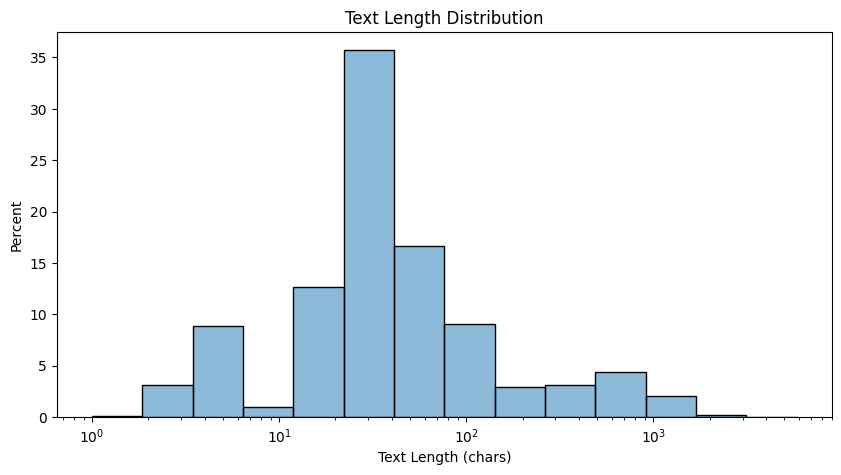

In [6]:
le.plot_text_length_distribution(bins=14,   
                                 stat='percent',
                                 log_scale=True,
                                )

/home/egharibnezhad/anaconda3/envs/pm-llms/lib/python3.9/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


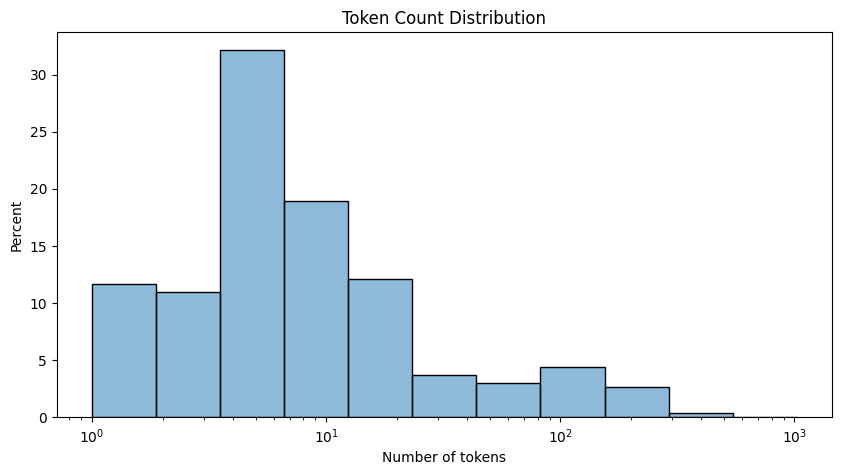

In [7]:
le.plot_token_count_distribution(bins= 11,
                                 stat='percent',
                                 log_scale=True,

)


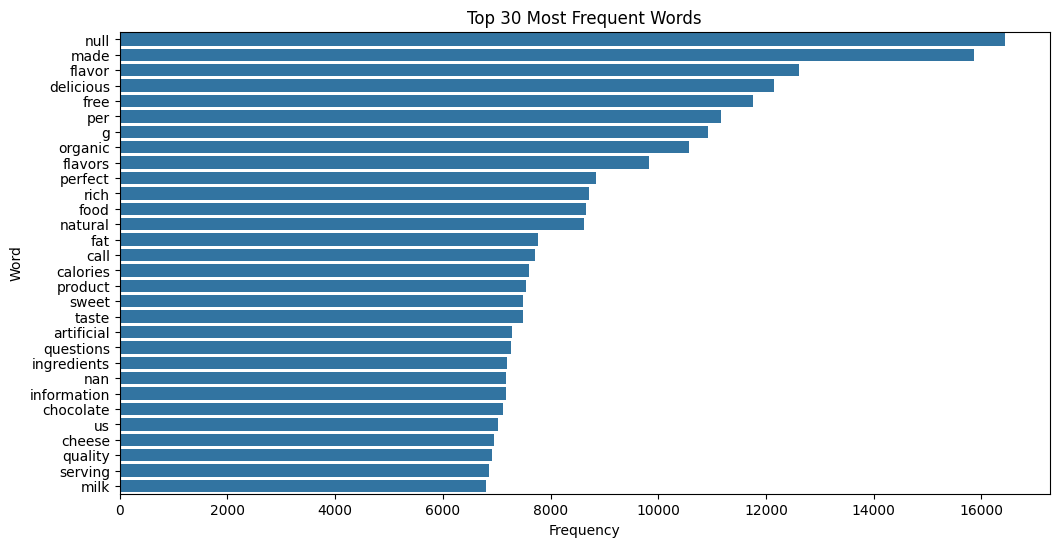

In [8]:
le.plot_top_k_words(k=30)


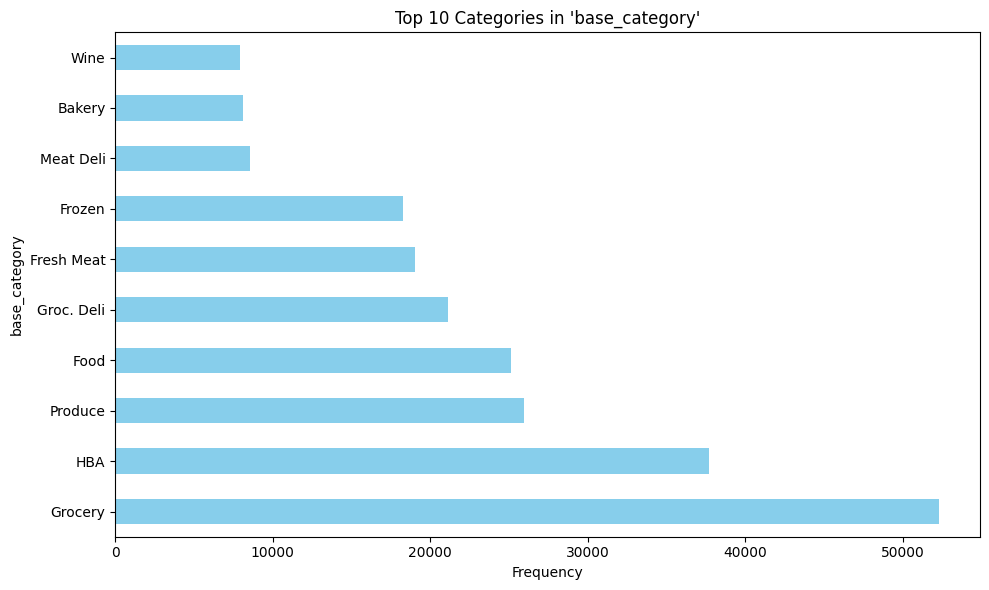

In [9]:
# Plots:
le.plot_top_categories(cat_col='base_category', top_n=10)


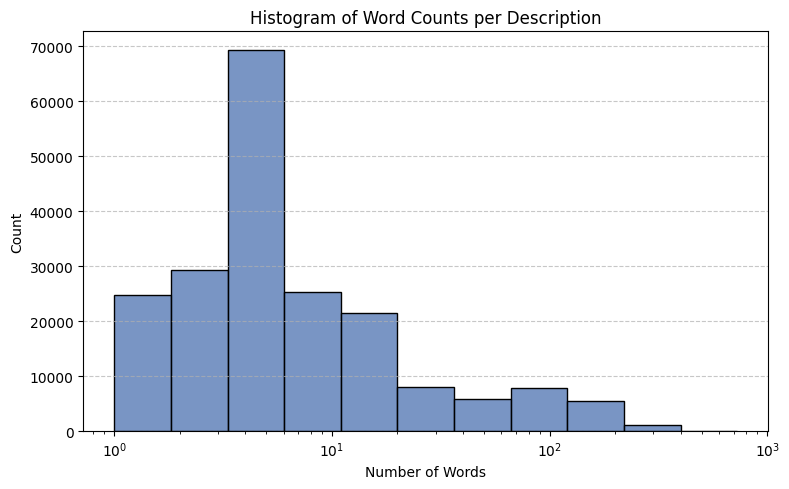

In [10]:
le.plot_word_count_histogram(bins=11, 
                             log_scale=True,
                            )


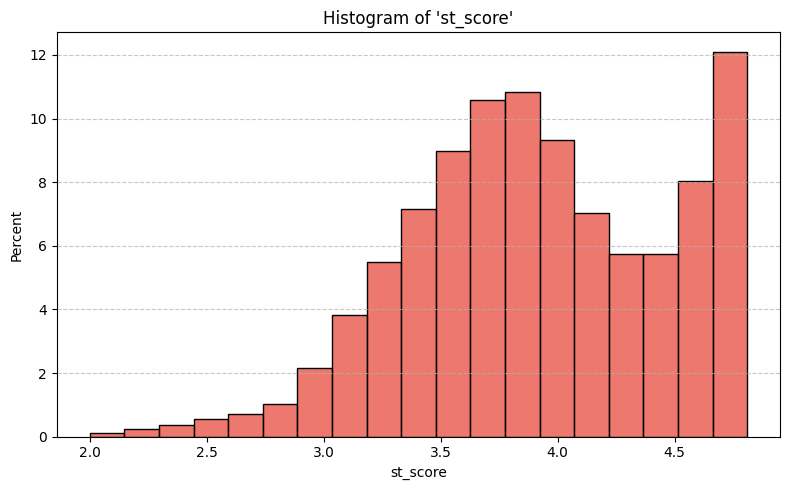

In [11]:
le.plot_score_histogram(score_col='st_score',     
                        stat = 'percent',
                        log_scale=False, 
                        bins=19)

In [12]:
# Show top matches:
le.show_top_matches(score_col='st_score', top_n=3)


Top 3 Matches (by 'st_score'):


,base_title,base_size,base_brand,base_description,base_source_store,base_category,base_sku,comp_title,comp_size,comp_brand,...,new_model_score,desc_key,score,dup_key,base_uuid,comp_uuid,row_num,text_length,num_tokens,word_count
135311,"Duncan Hines, Frosting, Keto Friendly, Chocola...",11.29,DUNCAN HINES,DUNCAN HINES FRSTING KETO CHOC,staterbros_staterbros,Grocery,11265898,Duncan Hines Keto Friendly Chocolate Flavored ...,12.0,CONAGRA BRANDS,...,0.0,duncan hines keto friendly chocolate flavored ...,nan,nan,nan,nan,nan,30,5,5
272840,"bloomscape, 4 inch blooming spider plant",4 inch,bloomscape,"bloomscape 4 inch blooming spider plant, air p...",llmsynthetic_llmsynthetic,Floral,55e218bb17,bloomscape 4 inch spider plant blooming,4 inch,bloomscape,...,0.0,"bloomscape, 4 inch blooming spider plantblooms...",nan,nan,nan,nan,nan,76,15,13
274786,"mccormick, crushed red pepper, gallon",gallon,mccormick,mccormick crushed red pepper.,llmsynthetic_llmsynthetic,Produce,7516079e09,"mccormick red pepper, crushed, gallon",gallon,mccormick,...,0.0,"mccormick, crushed red pepper, gallonmccormick...",nan,nan,nan,nan,nan,29,5,4
